In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
N = 500 #number of steps

def walk_gauss(steps):
    '''
    Simulates random walk in 2D. Length of a step is modulus of a variable from GAUSSIAN distribution.

    Args:
        steps: int - number of steps in a walk
    Returns:
        xs,ys: array - two arrays (coordinates for each step)
        np.sqrt(x**2 + y**2): float - distance between first and last coordinate
    '''
    xs = np.zeros(steps)
    ys = np.zeros(steps)
    x,y = 0,0
    for step in range(steps):
        theta = np.random.uniform(0,2*np.pi)
        r = abs(np.random.normal(0,1))
        xs[step] = xs[step-1] + np.cos(theta)*r
        ys[step] = ys[step-1] + np.sin(theta)*r
        x += np.cos(theta)*r
        y += np.sin(theta)*r
    return (xs,ys,np.sqrt(x**2 + y**2)) 

In [3]:
x1, y1, dist1 = walk_gauss(N)

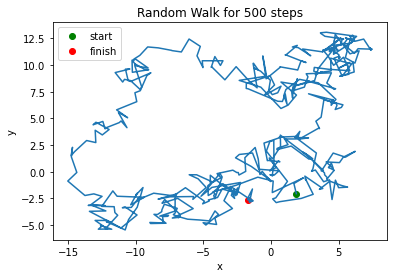

In [4]:
plt.plot(x1[0],y1[0],'go')
plt.plot(x1[-1],y1[-1],'ro')
plt.legend(['start','finish'])
plt.plot(x1,y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Walk for {} steps'.format(N))
plt.show()

In [5]:
YS1 = []
Y1 = []
for j in range(0,310,10):
    for i in range(200):
        Y1.append(walk_gauss(j)[2])
    YS1.append(np.mean(Y1))

XS1 = np.linspace(0,300,31)

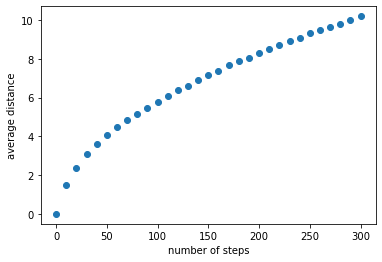

In [6]:
plt.plot(XS1,YS1,'o')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.show()

In [7]:
def f(x,a,b,c):
    return a + b * np.sqrt(x + c)

popt, pcov = curve_fit(f,XS1,YS1)
popt

array([-0.29111468,  0.60588918,  0.20858299])

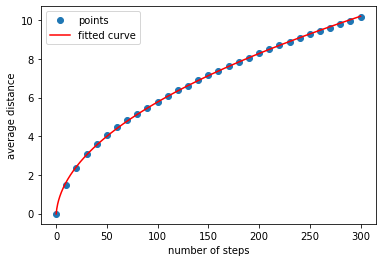

In [8]:
domain1 = np.linspace(0,300,1000)

plt.plot(XS1,YS1,'o')
plt.plot(domain1, f(domain1,*popt), 'r')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.legend(['points','fitted curve'])
plt.show()

In [9]:
def walk_cauchy(steps):
    '''
    Simulates random walk in 2D. Length of a step is modulus of a variable from CAUCHY distribution.

    Args:
        steps: int - number of steps in a walk
    Returns:
        xs,ys: array - two arrays (coordinates for each step)
        np.sqrt(x**2 + y**2): float - distance between first and last coordinate
    '''
    xs = np.zeros(steps)
    ys = np.zeros(steps)
    x,y = 0,0
    for step in range(steps):
        theta = np.random.uniform(0,2*np.pi)
        r = abs(np.random.standard_cauchy())
        xs[step] = xs[step-1] + np.cos(theta)*r
        ys[step] = ys[step-1] + np.sin(theta)*r
        x += np.cos(theta)*r
        y += np.sin(theta)*r
    return (xs,ys,np.sqrt(x**2 + y**2)) 

In [10]:
x2, y2, dist2 = walk_cauchy(N)

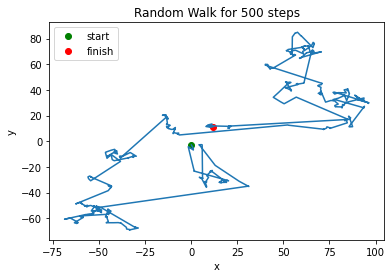

In [11]:
plt.plot(x2[0],y2[0],'go')
plt.plot(x2[-1],y2[-1],'ro')
plt.legend(['start','finish'])
plt.plot(x2,y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Walk for {} steps'.format(N))
plt.show()

In [12]:
YS2 = []
Y2 = []
for j in range(0,310,10):
    for i in range(200):
        Y2.append(walk_cauchy(j)[2])
    YS2.append(np.mean(Y2))

XS2 = np.linspace(0,300,31)

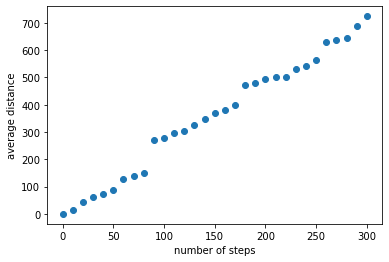

In [13]:
plt.plot(XS2,YS2,'o')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.show()

In [14]:
def g(x,a,b):
    return a*x+b

popt2, pcov2 = curve_fit(g,XS2,YS2)
popt2

array([2.37960295, 0.19877149])

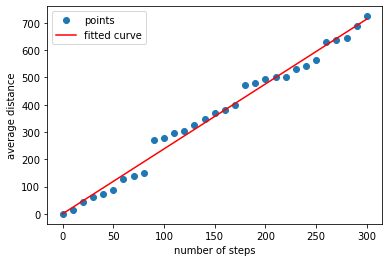

In [15]:
plt.plot(XS2,YS2,'o')
plt.plot(domain1, g(domain1,*popt2), 'r')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.legend(['points','fitted curve'])
plt.show()